# Imports

In [1]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import json

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Abrindo o classificador 

In [2]:
classifier = keras.models.load_model("modelo_treinado")

## Informações do history do classificador

In [3]:
f = open('history.json',)
history = json.load(f)

In [4]:
list_loss = []
for i in history['loss']: list_loss.append(history['loss'][i])

In [5]:
list_vloss = []
for i in history['loss']: list_vloss.append(history['val_loss'][i])

In [6]:
list_acc = []
for i in history['loss']: list_acc.append(history['accuracy'][i])

In [7]:
list_vacc = []
for i in history['loss']: list_vacc.append(history['val_accuracy'][i])

In [8]:
f.close()

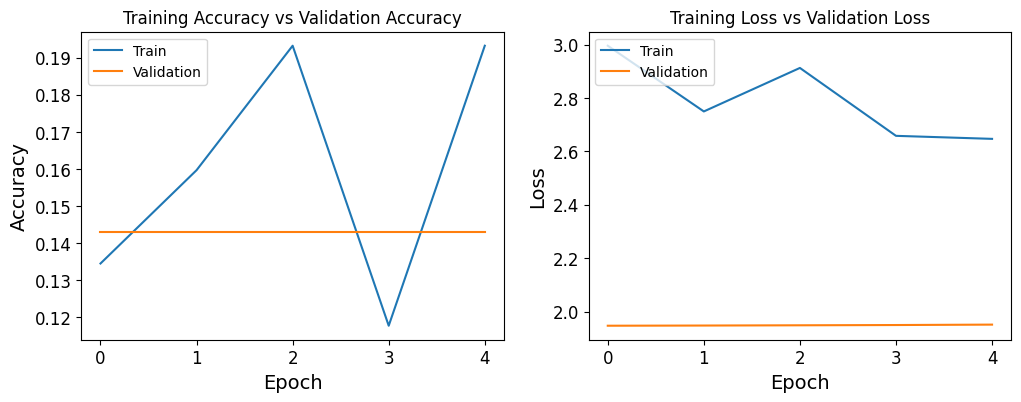

In [9]:
fig , ax = plt.subplots(1,2)
#train_acc = history['accuracy']
#train_loss = history['loss']
fig.set_size_inches(12,4)

ax[0].plot(list_acc)
ax[0].plot(list_vacc)
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(list_loss)
ax[1].plot(list_vloss)
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np

face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

emotion_labels = ['Angry','Disgust','Fear','Happy','Neutral', 'Sad', 'Surprise']

cap = cv2.VideoCapture(0)



while True:
    _, frame = cap.read()
    labels = []
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_gray = cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)



        if np.sum([roi_gray])!=0:
            roi = roi_gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)

            prediction = classifier.predict(roi)[0]
            label=emotion_labels[prediction.argmax()]
            label_position = (x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
        else:
            cv2.putText(frame,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
    cv2.imshow('Emotion Detector',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()